In [1]:
import effector
import numpy as np

In [2]:
np.random.seed(21)

In [3]:
dist = effector.datasets.IndependentUniform(dim=3, low=-1, high=1)
X_test = dist.generate_data(n=200)
axis_limits = dist.axis_limits

In [4]:
model = effector.models.DoubleConditionalInteraction()
predict = model.predict
jacobian = model.jacobian

In [5]:
y_limits = [-6, 8]
dy_limits = [-15, 15]

## Global Effects

### RHALE

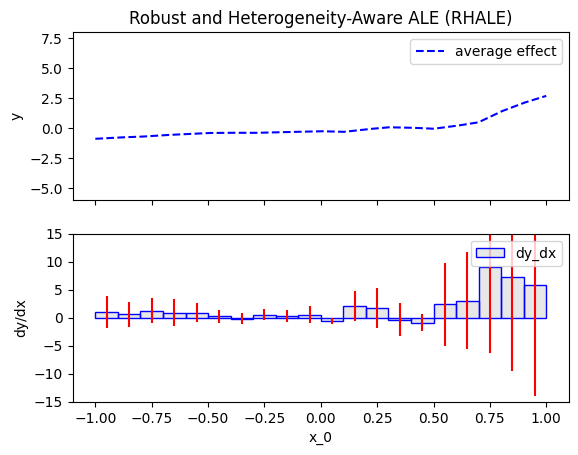

In [6]:
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

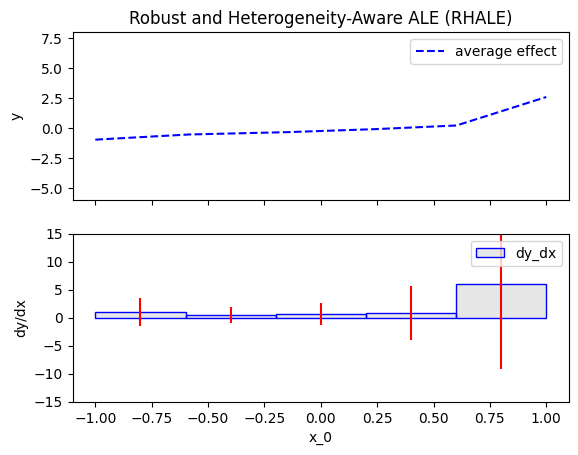

In [7]:
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
rhale.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=5))
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### ShapDP

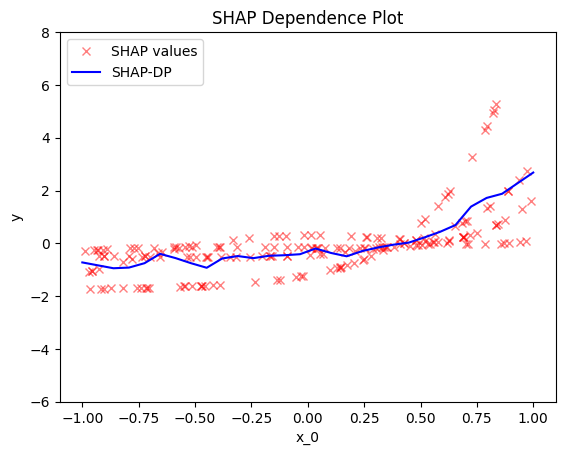

In [8]:
shap_dp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
shap_dp.plot(feature=0, y_limits=y_limits)

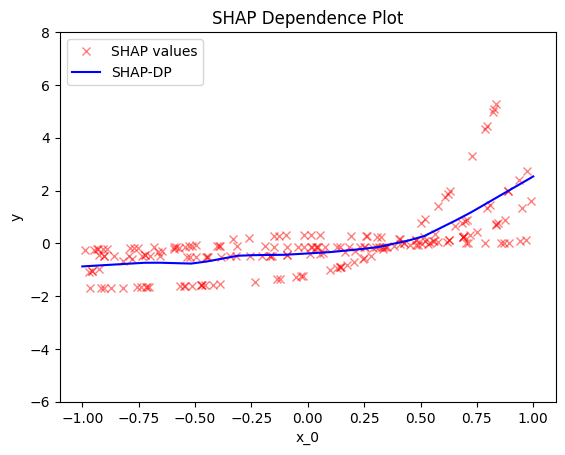

In [9]:
shap_dp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
shap_dp.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=10))
shap_dp.plot(feature=0, y_limits=y_limits)

## Regional Effect

### RHALE

In [10]:
r_rhale = effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")

In [11]:
r_rhale.summary(0)

100%|██████████| 1/1 [00:00<00:00,  2.08it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 60.47 | inst: 200 | w: 1.00]
    x_2 ≤ 0.00 🔹 [id: 1 | heter: 2.36 | inst: 105 | w: 0.53]
        x_1 ≤ 0.00 🔹 [id: 2 | heter: 0.06 | inst: 45 | w: 0.23]
        x_1 > 0.00 🔹 [id: 3 | heter: 0.00 | inst: 60 | w: 0.30]
    x_2 > 0.00 🔹 [id: 4 | heter: 70.28 | inst: 95 | w: 0.47]
        x_1 ≤ 0.00 🔹 [id: 5 | heter: 0.00 | inst: 45 | w: 0.23]
        x_1 > 0.00 🔹 [id: 6 | heter: 8.08 | inst: 50 | w: 0.25]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 60.47
    Level 1🔹heter: 34.62 | 🔻25.85 (42.75%)
        Level 2🔹heter: 2.03 | 🔻32.59 (94.12%)




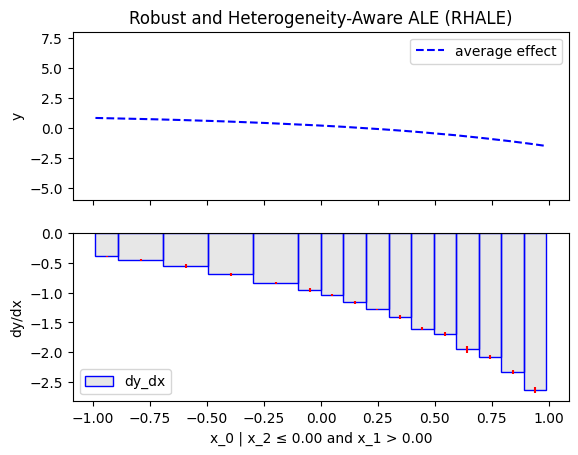

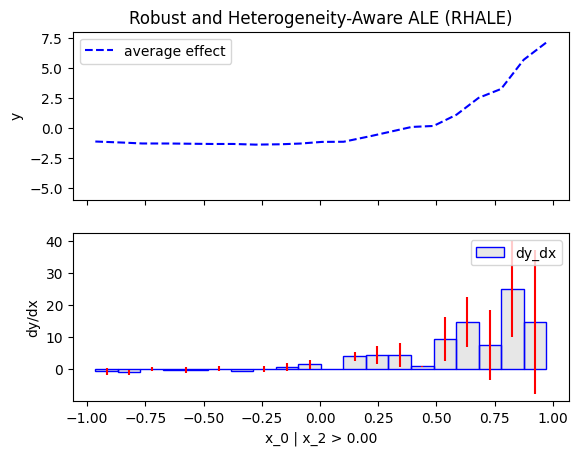

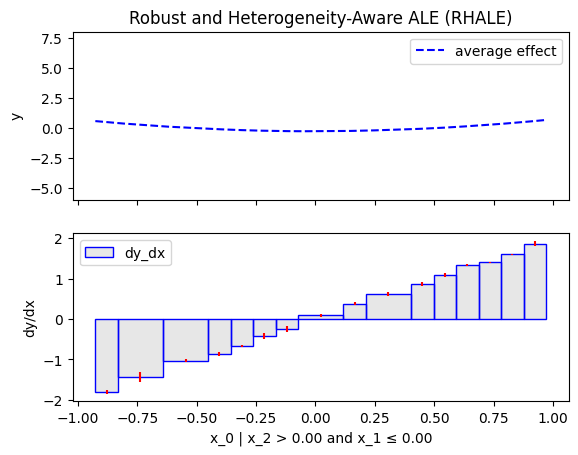

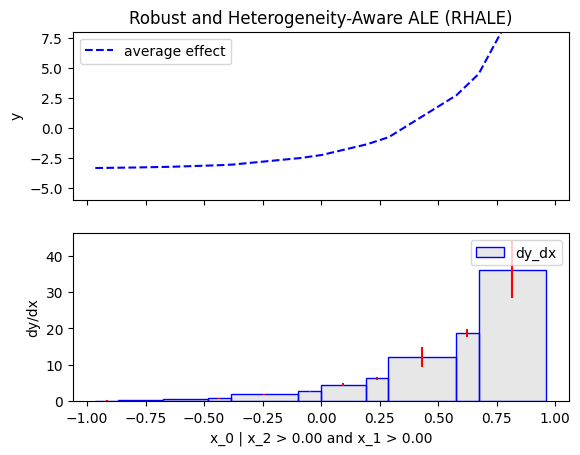

[None, None, None, None]

In [12]:
[r_rhale.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

In [13]:
r_rhale = effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")

In [14]:
space_partitioner = effector.space_partitioning.Best(max_depth=1)
binning_method = effector.axis_partitioning.Greedy(init_nof_bins=10)
r_rhale.fit(features=0, space_partitioner=space_partitioner, binning_method=binning_method)

100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


In [15]:
r_rhale.summary(0)



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 53.64 | inst: 200 | w: 1.00]
    x_2 ≤ 0.00 🔹 [id: 1 | heter: 2.42 | inst: 105 | w: 0.53]
    x_2 > 0.00 🔹 [id: 2 | heter: 61.95 | inst: 95 | w: 0.47]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 53.64
    Level 1🔹heter: 30.70 | 🔻22.94 (42.77%)




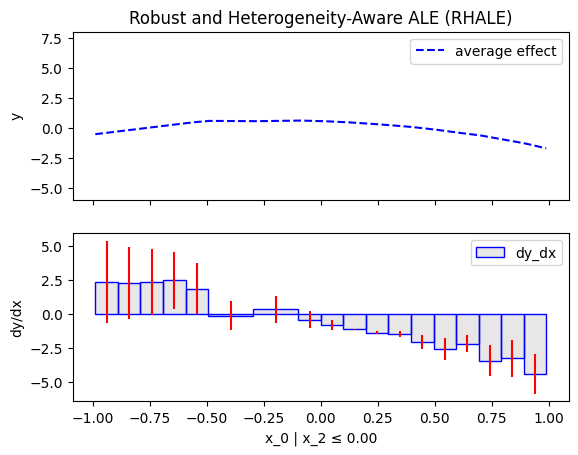

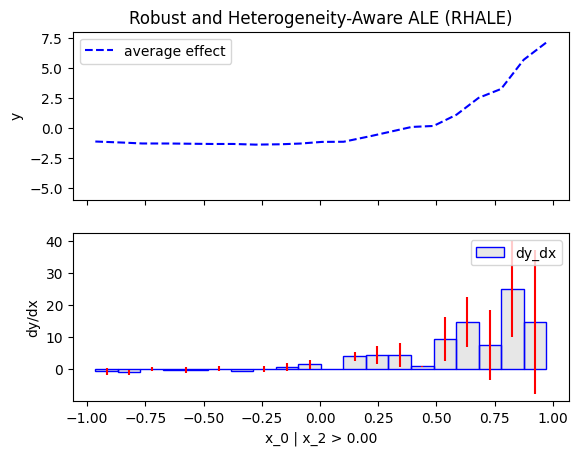

[None, None]

In [16]:
[r_rhale.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (1, 3)]

## SHAP-DP

In [17]:
r_shap_dp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")

In [18]:
r_shap_dp.summary(0)

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 1.06 | inst: 200 | w: 1.00]
    x_2 ≤ 0.00 🔹 [id: 1 | heter: 0.08 | inst: 105 | w: 0.53]
        x_1 ≤ 0.00 🔹 [id: 2 | heter: 0.00 | inst: 45 | w: 0.23]
        x_1 > 0.00 🔹 [id: 3 | heter: 0.00 | inst: 60 | w: 0.30]
    x_2 > 0.00 🔹 [id: 4 | heter: 0.98 | inst: 95 | w: 0.47]
        x_1 ≤ 0.00 🔹 [id: 5 | heter: 0.01 | inst: 45 | w: 0.23]
        x_1 > 0.00 🔹 [id: 6 | heter: 0.34 | inst: 50 | w: 0.25]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 1.06
    Level 1🔹heter: 0.51 | 🔻0.55 (52.16%)
        Level 2🔹heter: 0.09 | 🔻0.42 (82.71%)




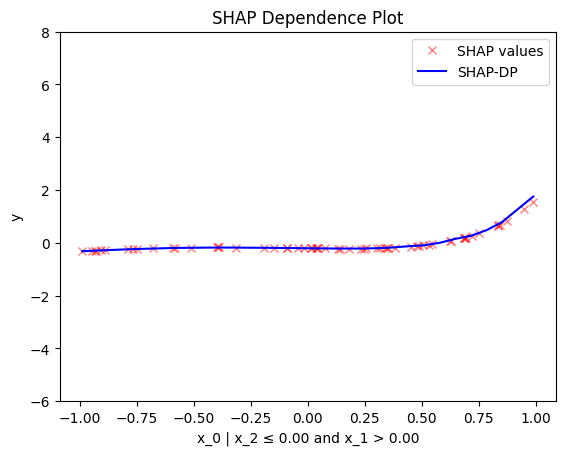

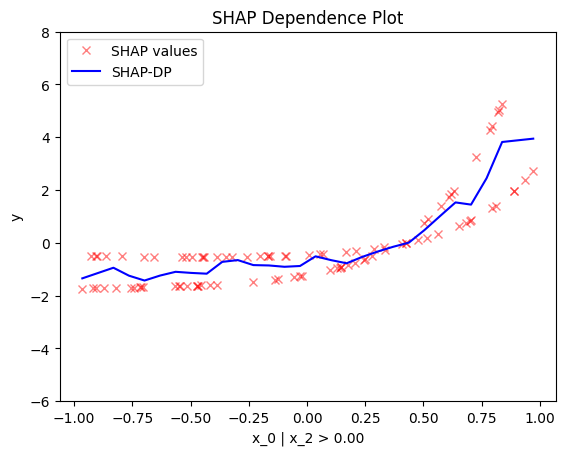

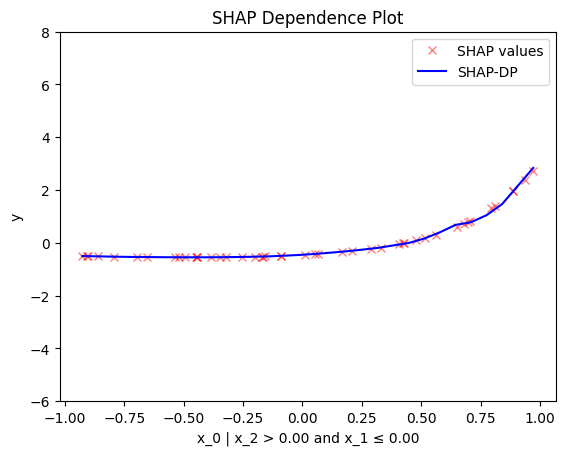

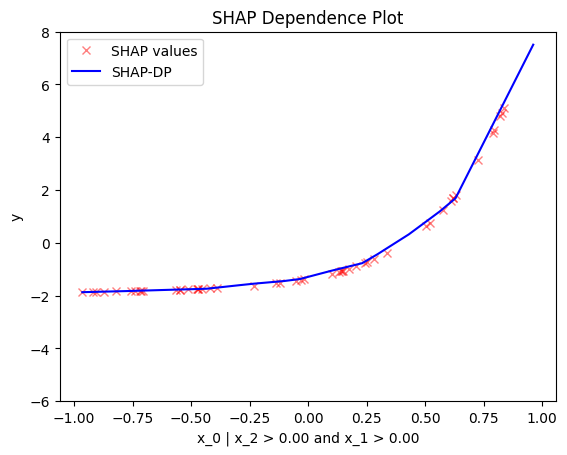

[None, None, None, None]

In [19]:
[r_shap_dp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

In [20]:
r_shap_dp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")

In [21]:
space_partitioner = effector.space_partitioning.Best(max_depth=1)
binning_method = effector.axis_partitioning.Greedy(init_nof_bins=10)
r_shap_dp.fit(features=0, space_partitioner=space_partitioner, binning_method=binning_method)

100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


In [22]:
r_shap_dp.summary(0)



Feature 0 - Full partition tree:
🌳 Full Tree Structure:
───────────────────────
x_0 🔹 [id: 0 | heter: 1.04 | inst: 200 | w: 1.00]
    x_2 ≤ 0.00 🔹 [id: 1 | heter: 0.08 | inst: 105 | w: 0.53]
    x_2 > 0.00 🔹 [id: 2 | heter: 0.97 | inst: 95 | w: 0.47]
--------------------------------------------------
Feature 0 - Statistics per tree level:
🌳 Tree Summary:
─────────────────
Level 0🔹heter: 1.04
    Level 1🔹heter: 0.50 | 🔻0.54 (51.98%)




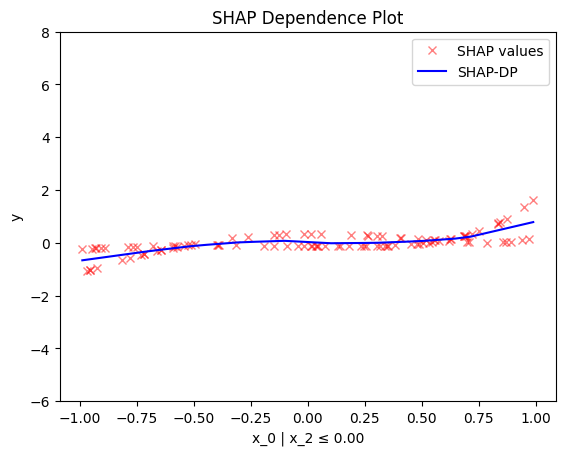

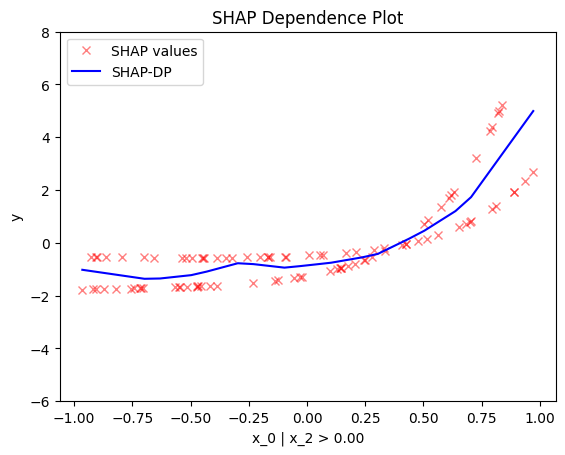

[None, None]

In [23]:
[r_shap_dp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (1, 3)]